In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

In [62]:
api = wandb.Api()

entity = "justin_yang-university-of-california-berkeley"
project = "cs182-project-GPT-opt"
sweep_id = "5pllqyjx" # phase1-safetyfactor

sweep = api.sweep(f"{entity}/{project}/{sweep_id}")

In [71]:
for run in sweep.runs:
    print(f"Run ID: {run.id}")
    # print("---------- CONFIG ----------")
    # print("Safety Factor:", run.config["optimizer_params"]["args"])
    # for key in run.config.keys():
    #     print(key + ":", run.config[key])
    # print(run.summary["svd/update_layer0_v/condition_number"])
    print("---------- SUMMARY ----------")
    for key in run.summary.keys():
        print(key + ":", run.summary[key])
    # print("---------- HISTORY ----------")
    # for step in run.scan_history():
    #     # print(step["svd/update_layer0_stacked/condition_number"])
    #     for key in step.keys():
    #         print(key)
    #     break
    break

Run ID: ud9tmam7
---------- SUMMARY ----------
_runtime: 12825
_step: 243
_timestamp: 1763465156.9091768
_wandb: {'runtime': 12825}
attn/layer0/entropy/mean: 3.718064069747925
attn/layer0/entropy/p05: 0.5352387428283691
attn/layer0/entropy/p95: 5.961906433105469
attn/layer0/maxA/frac>0.95: 0.0235722865909338
attn/layer11/entropy/mean: 5.8129472732543945
attn/layer11/entropy/p05: 3.801229238510132
attn/layer11/entropy/p95: 6.792784690856934
attn/layer11/maxA/frac>0.95: 0.0011342366924509406
attn/layer5/entropy/mean: 3.177940368652344
attn/layer5/entropy/p05: 0.8560092449188232
attn/layer5/entropy/p95: 5.059100151062012
attn/layer5/maxA/frac>0.95: 0.01346333883702755
logits/layer0/max_p95: 5.670355796813965
logits/layer0/mean: 1.2459101676940918
logits/layer0/std: 2.4158871173858643
logits/layer11/max_p95: 0.6512631773948669
logits/layer11/mean: -0.1083931177854538
logits/layer11/std: 0.48496928811073303
logits/layer5/max_p95: 5.383907794952393
logits/layer5/mean: -0.03547085449099541
lo

In [68]:
def get_data(sweep_id, optimizer_param):

    entity = "justin_yang-university-of-california-berkeley"
    project = "cs182-project-GPT-opt"

    api = wandb.Api()
    sweep = api.sweep(f"{entity}/{project}/{sweep_id}")

    runs = {}

    for run in sweep.runs:
        run_id = run.id
        run_param = run.config["optimizer_params"]["args"][optimizer_param]

        runs["svd/update_layer0_stacked/condition_number"] = [step["svd/update_layer0_stacked/condition_number"] for step in run.scan_history()]

        break

    return runs

In [72]:
data_polar_safety = get_data("5pllqyjx", "polar_safety")

<Axes: xlabel='Step', ylabel='svd/update_layer0_stacked/condition_number'>

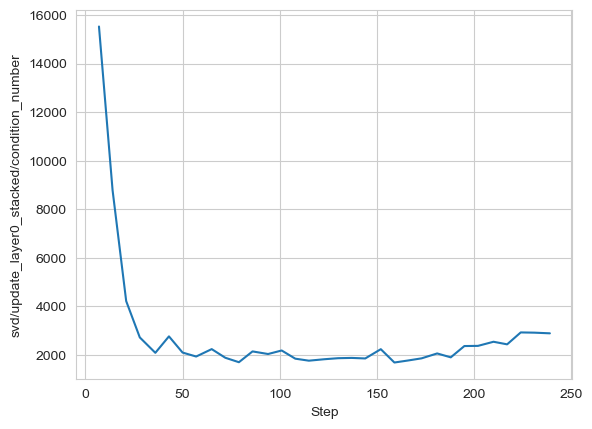

In [77]:
cond_num = data_polar_safety["svd/update_layer0_stacked/condition_number"]
data_polar_safety["Step"] = range(1, len(cond_num)+1)
df_test = pd.DataFrame(data_polar_safety)

sns.lineplot(data=df_test, x="Step", y=f"svd/update_layer0_stacked/condition_number")

In [49]:
def plot_data(update, layer, matrix, metric, start, end, save_plot=False):

    if update:
        df = pd.read_csv(f"./data/update_layer{layer}_{matrix}_{metric}.csv")
    else:
        df = pd.read_csv(f"./data/layer{layer}_{matrix}_{metric}.csv")
    
    df_iloc = df.iloc[start:end+1]
    step = df_iloc["Step"]
    lines = [
        "jolly-sweep-1",
        "valiant-sweep-2",
        # "different-sweep-3",
        # "distinctive-sweep-4",
        # "decent-sweep-5",
        # "vivid-sweep-6",
    ]
    sns.set_style("whitegrid")
    for line in lines:
        if update:
            ax = sns.lineplot(data=df_iloc, x="Step", y=f"{line} - svd/update_layer{layer}_{matrix}/{metric}")
            min_vec = df_iloc[f"{line} - svd/update_layer{layer}_{matrix}/{metric}__MIN"]
            max_vec = df_iloc[f"{line} - svd/update_layer{layer}_{matrix}/{metric}__MAX"]
        else:
            ax = sns.lineplot(data=df_iloc, x="Step", y=f"{line} - svd/layer{layer}_{matrix}/{metric}")
            min_vec = df_iloc[f"{line} - svd/layer{layer}_{matrix}/{metric}__MIN"]
            max_vec = df_iloc[f"{line} - svd/layer{layer}_{matrix}/{metric}__MAX"]
            
        ax.set_xlabel("Step")
        ax.set_ylabel(f"{metric.replace("_", " ").title()}")

        if update:
            ax.set_title(f"Update Layer {layer} {matrix.title()} - {metric.replace("_", " ").title()} vs. Steps")
        else:
            ax.set_title(f"Layer {layer} {matrix.title()} - {metric.replace("_", " ").title()} vs. Steps")
        
        plt.fill_between(step, min_vec, max_vec, alpha=0.5)
    
    if save_plot:
        if update:
            plt.savefig(f"./plots/update_layer{layer}_{matrix}_{metric}.jpg")
        else:
            plt.savefig(f"./plots/layer{layer}_{matrix}_{metric}.jpg")
    plt.show();

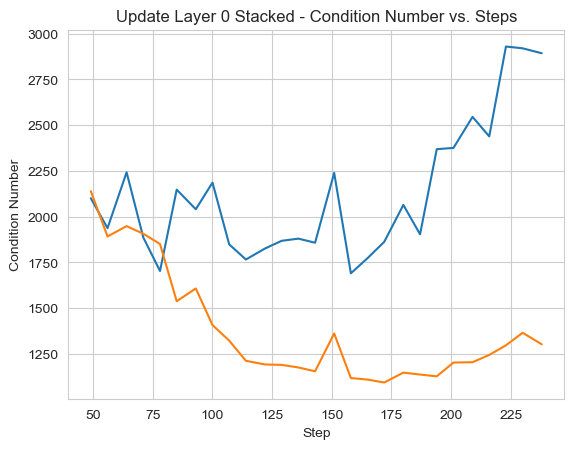

In [50]:
update = True
layer = 0
matrix = "stacked"
metric = "condition_number"
start = 6
end = 32
save_plot = True

plot_data(update, layer, matrix, metric, start, end, save_plot)

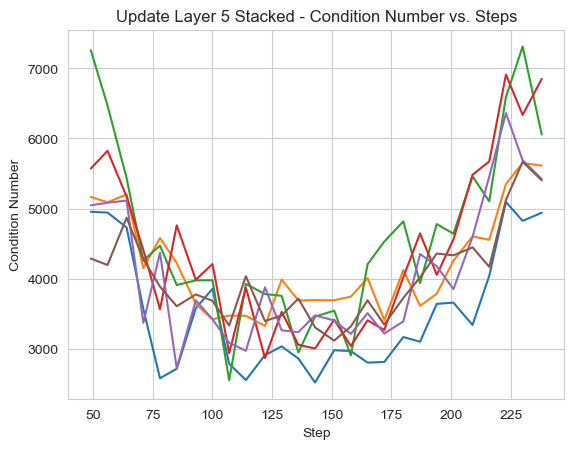

In [11]:
update = True
layer = 5
matrix = "stacked"
metric = "condition_number"
start = 6
end = 32
save_plot = True

plot_data(update, layer, matrix, metric, start, end, save_plot)

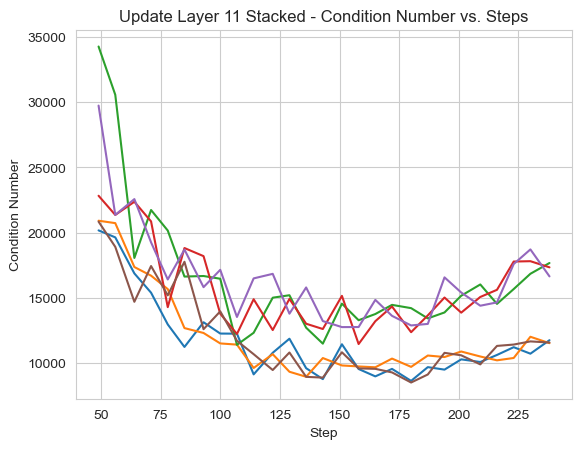

In [12]:
update = True
layer = 11
matrix = "stacked"
metric = "condition_number"
start = 6
end = 32
save_plot = True

plot_data(update, layer, matrix, metric, start, end, save_plot)